# GPU Version to run on MARCC

This notebook is assummed to be launched from the top level of the AutomaticLP github repo (where the notebook file is)

This also assummes that you've already cloed the tensorflow object detection project
https://github.com/tensorflow/models (since you need to do this to add the python path to  the bashrc file which has to be done before launching jupyter lab

Run with the LPproject kernel

## Setup / Installations

Add
<code>
export PYTHONPATH=$PYTHONPATH:`pwd`
export PYTHONPATH=$PYTHONPATH:`pwd`/slim

to your ~/.bashrc file where pwd is the full path to the models/research directory

### Tests that Tensorflow GPU is installed & this notebook can see the GPU 

These don't need to be run everytime but are here as a sanity / debugging check

In [ ]:
# test that tensorflow can access a GPU
import tensorflow as tf
tf.test.is_built_with_cuda()

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
print ('Default GPU Device: {}'.format(tf.test.gpu_device_name()))


In [ ]:
%%bash 
cd models/research
FILE=protobuf.zip
if [ ! -f "$FILE" ]; then
    wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip
    unzip protobuf.zip
fi
./bin/protoc object_detection/protos/*.proto --python_out=.
pip install --user .

In [ ]:
!ml cuda/9.0
!export CUDA_VISIBLE_DEVICES=1
!echo ${CUDA_VISIBLE_DEVICES}

## Generating Datasets

The ScriptForBashFile generates both the training and test data and TFRecords from the image files

(For now hard coded to 100 images - TODO: switch back to user input, note then this won't be able to run with a bash script)

In [1]:
%run ScriptForBashFile

Enter the total number of samples (60% is training, 40% is testing):  100


TrainingImages_2020-04-09_18-00
60  Training Images Generated
TestImages_2020-04-09_18-00
40  Test Images Generated



## Train


In [2]:
# If training output directory dosen't exist create it
!mkdir -p trainingOutput

In [9]:
# This makes the output of the next cell write to the file
# https://stackoverflow.com/questions/45200375/stdout-redirect-from-jupyter-notebook-is-landing-in-the-terminal
import sys
old_stdout = sys.stdout
sys.stdout = open('trainingLog.txt', 'w')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use object_detection/model_main.py.


Instructions for updating:
Please switch to tf.train.create_global_step



Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset

In [10]:
%cd models/research
%run object_detection/legacy/train.py --logtostderr --train_dir=../../trainingOutput/ --pipeline_config_path=../../FromScratch/models/model/ssd_mobilenet_v1_coco.config 
%cd ../..

W0409 18:40:15.649783 140701330859840 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0409 18:40:15.728253 140701330859840 deprecation.py:323] From /home/christina/anaconda3/envs/LPEnviroment/lib/python3.7/site-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.
W0409 18:40:15.729650 140701330859840 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/legacy/train.py:91: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W0409 18:40:15.737631 140701330859840 m

AttributeError: 'function' object has no attribute 'called'

In [11]:
# Put the cell output back to normal
sys.stdout = old_stdout

In [ ]:
%matplotlib inline
%run viewTraining.py

## Evaluation

Both Evaluation and Training outputs can be looked at in Tensorboard for extra details

**TODO: update checkpoint number based on number of steps trained to** 

In [ ]:
from os import listdir
import re

%cd trainingOutput
checkpointList = os.listdir()
%cd ..

def extract_numbers(f):
    s = re.findall("\d+", f)
    print(s)
    return (int(s[0]) if s else -1, f)

print(max(checkpointList,key=extract_numbers))
#print(extract_numbers(checkpointList)[0])
#fullfilename = filepoint + ".data-00000-of-00001"



In [12]:
%cd models/research
!python object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path ../../FromScratch/models/model/ssd_mobilenet_v1_coco.config --trained_checkpoint_prefix ../../trainingOutput/model.ckpt-200 --output_directory ../../inference_graph
%cd ../..

[Errno 2] No such file or directory: 'models/research'
/home/christina/Documents/Thesis/AutomaticLP/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0409 19:05:06.983628 140020551960384 module_wrapper.py:139] From object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0409 19:05:06.991765 140020551960384 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0409 19:05:06.992019 140020551960384 module_wrapper.py:139] From /home/christi

Enter Test Image Directory Name:  TestImages_2020-04-09_18-00
Enter Threshold (0-1) for object detection:  .5


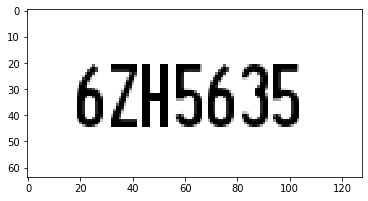

Show another image (y/n)?  y


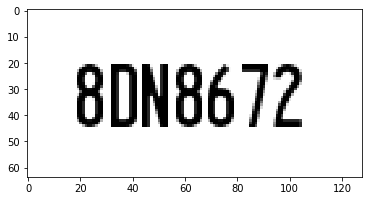

Show another image (y/n)?  y


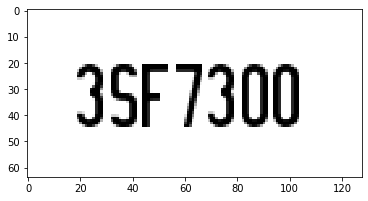

Show another image (y/n)?  y


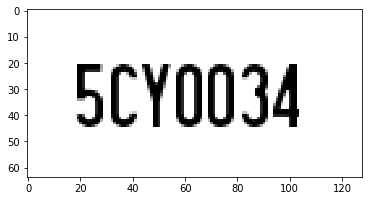

Show another image (y/n)?  y


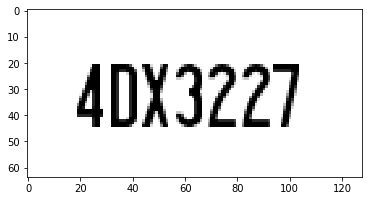

Show another image (y/n)?  y


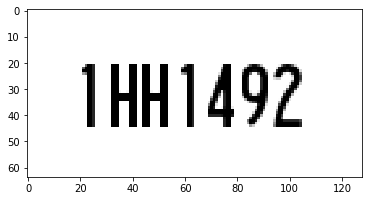

Show another image (y/n)?  y


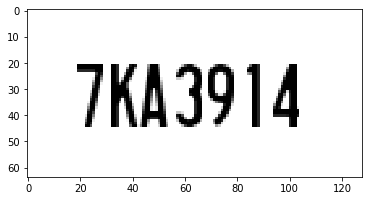

Show another image (y/n)?  y


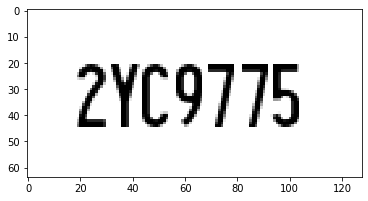

Show another image (y/n)?  y


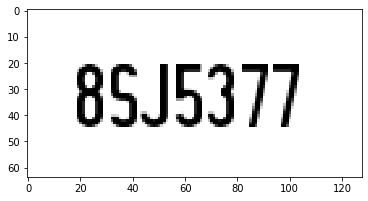

KeyboardInterrupt: 

Show another image (y/n)?  n


In [14]:
%matplotlib inline
%run customEvaluation.py

In [1]:
%cd models/research
%run object_detection/inference/infer_detections.py --input_tfrecord_paths=../../FromScratch/TFRecordEval.tfrecord --inference_graph=../../inference_graph/frozen_inference_graph.pb --output_tfrecord_path=../../TFExamples.tfrecord
%cd ../..

/home/christina/Documents/Thesis/AutomaticLP/models/research




W0409 19:06:49.483758 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:57: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.



W0409 19:06:49.485647 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:57: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.



W0409 19:06:49.487324 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:65: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



W0409 19:06:49.519479 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:68: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.



INFO:tensorflow:Reading input from 1 files


I0409 19:06:49.523010 140118491412288 infer_detections.py:68] Reading input from 1 files


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.


W0409 19:06:49.526007 140118491412288 deprecation.py:323] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:35: string_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.


W0409 19:06:49.539459 140118491412288 deprecation.py:323] From /home/christina/.local/lib/python3.7/site-packages/tensorflow_core/python/training/input.py:277: input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.


W0409 19:06:49.542540 140118491412288 deprecation.py:323] From /home/christina/.local/lib/python3.7/site-packages/tensorflow_core/python/training/input.py:189: limit_epochs (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.


Instructions for updating:
Prefer Dataset.range instead.


W0409 19:06:49.551163 140118491412288 deprecation.py:323] From /home/christina/.local/lib/python3.7/site-packages/tensorflow_core/python/training/input.py:112: RefVariable.count_up_to (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Prefer Dataset.range instead.


Instructions for updating:
Prefer Dataset.range instead.


W0409 19:06:49.553434 140118491412288 deprecation.py:323] From /home/christina/.local/lib/python3.7/site-packages/tensorflow_core/python/ops/variables.py:2522: count_up_to (from tensorflow.python.ops.state_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Prefer Dataset.range instead.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0409 19:06:49.564457 140118491412288 deprecation.py:323] From /home/christina/.local/lib/python3.7/site-packages/tensorflow_core/python/training/input.py:198: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0409 19:06:49.571196 140118491412288 deprecation.py:323] From /home/christina/.local/lib/python3.7/site-packages/tensorflow_core/python/training/input.py:198: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.


W0409 19:06:49.579435 140118491412288 deprecation.py:323] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:37: TFRecordReader.__init__ (from tensorflow.python.ops.io_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.


W0409 19:06:49.588184 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:39: The name tf.parse_single_example is deprecated. Please use tf.io.parse_single_example instead.



W0409 19:06:49.591354 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:43: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.



INFO:tensorflow:Reading graph and building model...


I0409 19:06:49.658136 140118491412288 infer_detections.py:71] Reading graph and building model...


W0409 19:06:49.659804 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:68: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.



W0409 19:06:49.702615 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:70: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



W0409 19:06:50.347580 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:76: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



INFO:tensorflow:Running inference and writing output to ../../TFExamples.tfrecord


I0409 19:06:50.376268 140118491412288 infer_detections.py:77] Running inference and writing output to ../../TFExamples.tfrecord


W0409 19:06:50.379289 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:78: The name tf.local_variables_initializer is deprecated. Please use tf.compat.v1.local_variables_initializer instead.



Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0409 19:06:50.555511 140118491412288 deprecation.py:323] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:79: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


W0409 19:06:50.559121 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:80: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.



W0409 19:06:50.561600 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/infer_detections.py:84: The name tf.logging.log_every_n is deprecated. Please use tf.compat.v1.logging.log_every_n instead.



INFO:tensorflow:Processed 0 images...


I0409 19:06:50.563632 140118491412288 infer_detections.py:85] Processed 0 images...


W0409 19:06:50.566015 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/inference/detection_inference.py:117: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



INFO:tensorflow:Processed 10 images...


I0409 19:06:52.268836 140118491412288 infer_detections.py:85] Processed 10 images...


INFO:tensorflow:Processed 20 images...


I0409 19:06:52.811963 140118491412288 infer_detections.py:85] Processed 20 images...


INFO:tensorflow:Processed 30 images...


I0409 19:06:53.464683 140118491412288 infer_detections.py:85] Processed 30 images...


INFO:tensorflow:Processed 40 images...


I0409 19:06:54.004853 140118491412288 infer_detections.py:85] Processed 40 images...


INFO:tensorflow:Finished processing records


I0409 19:06:54.036877 140118491412288 infer_detections.py:92] Finished processing records


/home/christina/Documents/Thesis/AutomaticLP


In [2]:
%cd tf_object_detection_cm
%run confusion_matrix.py --detections_record=../Test.tfrecord --label_map=../FromScratch/data/label_map.pbtxt --output_path=confusion_matrix.csv
%cd ..

/home/christina/Documents/Thesis/AutomaticLP/tf_object_detection_cm



W0409 19:07:01.499638 140118491412288 module_wrapper.py:139] From /home/christina/Documents/Thesis/AutomaticLP/models/research/object_detection/utils/label_map_util.py:138: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0409 19:07:01.505670 140118491412288 deprecation.py:323] From /home/christina/Documents/Thesis/AutomaticLP/tf_object_detection_cm/confusion_matrix.py:38: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 400 images

Confusion Matrix:
[[ 30.   0.   0. ...   0.   0. 160.]
 [  0.  43.   0. ...   0.   0. 153.]
 [  0.   3.   0. ...   0.   0. 203.]
 ...
 [  0.   0.   0. ...   0.   0.  33.]
 [  0.   0.   0. ...   0.   0. 188.]
 [  4.   0.   0. ...   0.   0.   0.]] 

   category  precision_@0.5IOU  recall_@0.5IOU
0         0                NaN        0.000000
1         1           0.535714        0.157895
2         2           0.934783        0.219388
3         3                NaN        0.000000
4         4           1.000000        0.025641
5         5           1.000000        0.043956
6         6           1.000000        0.101449
7         7           1.000000        0.058824
8         8           0.015873        0.005181
9         9                NaN        0.000000
10        A                NaN        0.000000
11        B                NaN        0.000000
12        C                NaN     

/home/christina/Documents/Thesis/AutomaticLP/tf_object_detection_cm/confusion_matrix.py:115: RuntimeWarning: invalid value encountered in double_scalars
  precision = float(confusion_matrix[id, id] / total_predicted)


/home/christina/Documents/Thesis/AutomaticLP
